In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Pixels = 100
Area = 200
wide_bright = 30 
wide_dark = 50
cycle_length = wide_bright + wide_dark

x = np.linspace(0, Area , Pixels)
y = np.linspace(0, Area , Pixels)
x , Y  = np.meshgrid(x,y)

pattern_mask = (x % cycle_length) < wide_bright 
Image = np.zeros((Pixels,Pixels))
Image[pattern_mask] = 10000
Image[~pattern_mask] = 500

noise_level = 2000
noise = np.random.normal(0 , noise_level , Image.shape )
Image_noise = Image + noise

#FFT
F = np.fft.fft2(Image_noise)
Fshift = np.fft.fftshift(F)
magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)


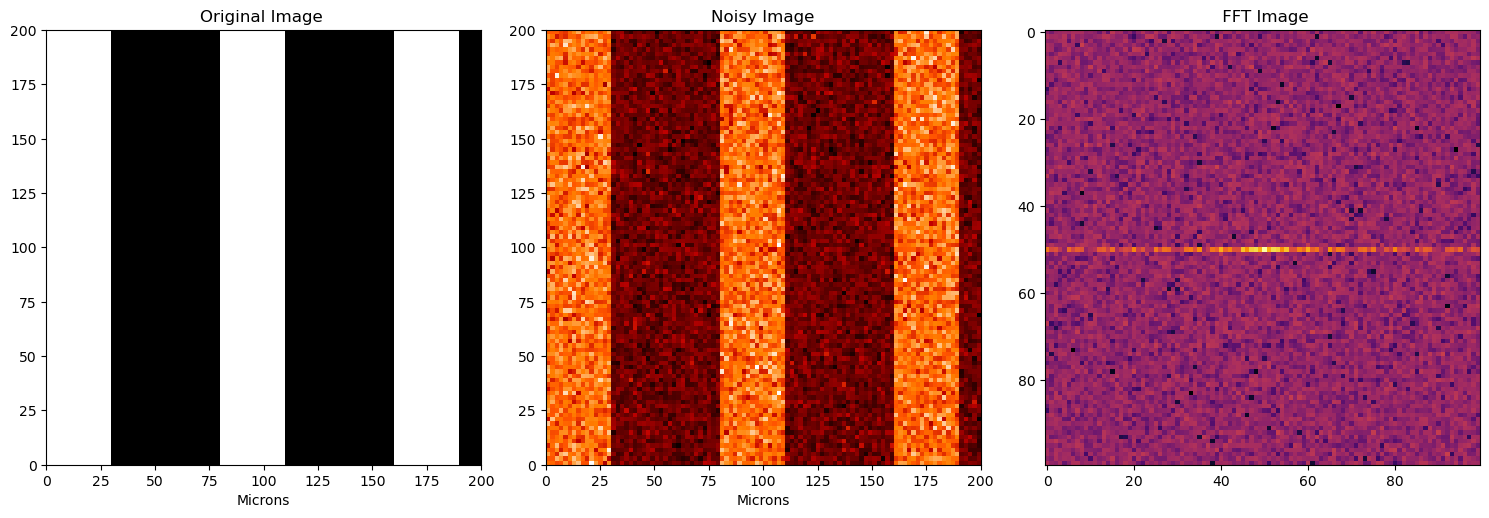

In [19]:
plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.imshow(Image, cmap='gray', extent=[0, Area, 0, Area])
plt.title('Original Image ')
plt.xlabel('Microns')


plt.subplot(132)
plt.imshow(Image_noise, cmap='gist_heat', extent=[0, Area, 0, Area])
plt.title('Noisy Image')
plt.xlabel('Microns')


plt.subplot(133)
plt.imshow(magnitude_spectrum, cmap='inferno') 
plt.title(' FFT Image')

plt.tight_layout()
plt.show()